# Excercises
For Data visualization excercises, let's take a look at a rather cute topic: penguins.

This dataset can be found [here](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data)

It contains a the following information about penguins living in Antarcitca gathered by researchers at the Palmer research Station.


|Variable| Definition|
|-----------|------------------------|
| species:  | penguin species (Chinstrap, Adélie, or Gentoo) |
|culmen_length_mm | culmen length (mm)|
|culmen_depth_mm |culmen depth (mm)|
|flipper_length_mm| flipper length (mm) |
|body_mass_g| body mass (g)
|island| island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)|
|sex| penguin sex|


The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

![image](penguins.jpg)

In [2]:
#Setup the preliminaries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline



In [3]:

penguins = pd.read_csv("penguins_size.csv")

#Note: This is real data.  In real data there is often issues and things arent' quite neat
#and tidy.  In this case it wasn't always possible to make every measure from every penguin
#The missing values are coded NaN.   For our purposes today we remove any penguins that
# don't have full set of measurements
# To do this we can use the dropna() functions to remove these rows from the dataframe 
# some penguins ahve 
penguins = penguins.dropna()

#There is also an error where 1 penguin has a error with "." recorded for sex. 
#Here I keep everying not equal (!=) to a '.'
penguins = penguins[ penguins['sex']!='.']


## Categorical Plots

Make a bar of the body mass for each species of penguin. 

Make a box plot for the flipper length for each species. 

Next, for each of the 3 species seperately, make a categorical plots of your choice for the body mass for the 2 sexes.  That is 3 seperate panels.  These can be done in the same "plot" but should have bars for each sex. NOTE: Not all observations include the sex of the bird (some values are empty).  




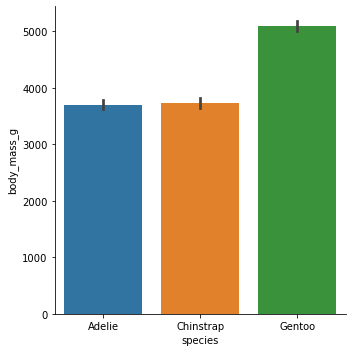

In [4]:
sns.catplot(data=penguins,x='species',y='body_mass_g',kind='bar')

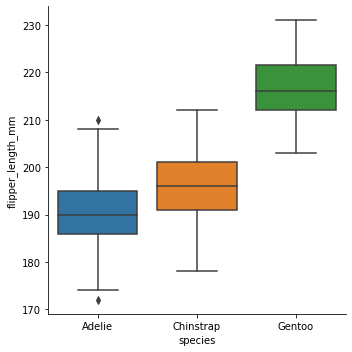

In [5]:
sns.catplot(data=penguins,x='species',y='flipper_length_mm',kind='box')

In [6]:
penguins.query('species=="Gentoo"')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


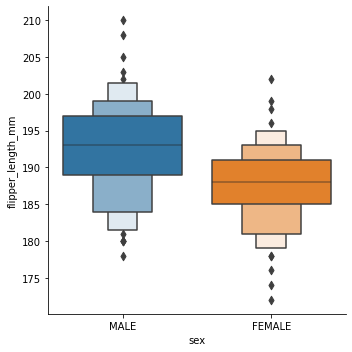

In [7]:
#One way to accomplish this excercise is to split the dataframe into 3 separate dataframes for each species
#It makes for more easily readable code and conceptually simpler.
#However, it locks the code into these 3 species.  Adding more species to the data set requires 
#writing new code for each species.  It also can lead to bugs if you want to add/manipulate the data later
gentoo = penguins[penguins['species']=='Gentoo']
adelie = penguins[penguins['species']=='Adelie']
chinstrap = penguins[penguins['species']=='Chinstrap']

sns.catplot(data=adelie,x='sex',y='flipper_length_mm',kind='boxen')





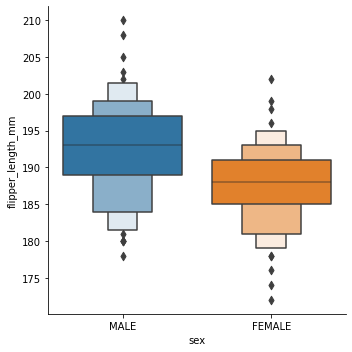

In [8]:
#An alternative way is to use the pandas query() function to select only some of the data

sns.catplot(data=penguins.query('species=="Adelie"'),x='sex',y='flipper_length_mm',kind='boxen')


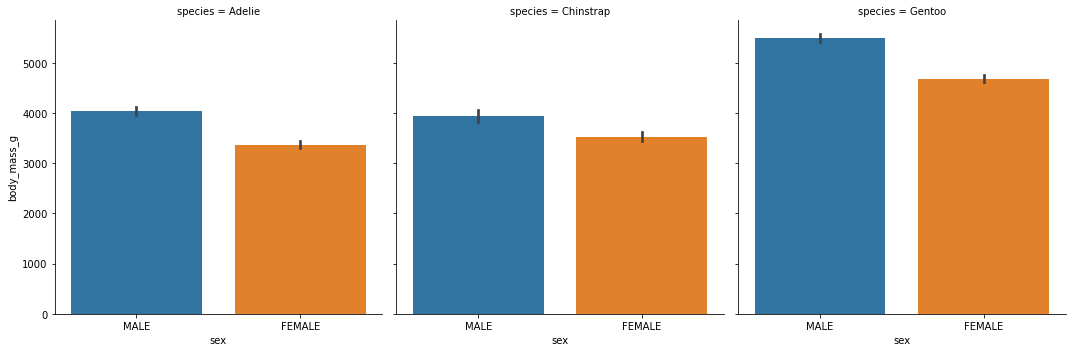

In [9]:
sns.catplot(data=penguins,x='sex',y='body_mass_g',col='species',kind='bar')

## Scatter plots

scatter plots are most useful when we are trying to determine the relationship between two numeric variables. 
For example, would a heavier body mass indicate generically larger pengiuins? 

To answer the question try drawing a few scatter plots of: culmen length vs body mass, culmen depth vs body mass, flippper length vs body mass.   There are many Try to make at least one of these scatter plots include all species in one plotlabeled by different colors.

Importantly for plots to be interpretible by others proper labels need to be included. Seaborn adds things automatically.  But often these can be cryptic to people not familiar with your data.  You usually have to change these to a more understandble value.   In order to gain practice be sure to add to at least one of the graphs:

What is the x axis?
What is the y axis?
If multiple colors/symbols what do they represent?

Add a title for what the graph is showing.




##  Seaborn method

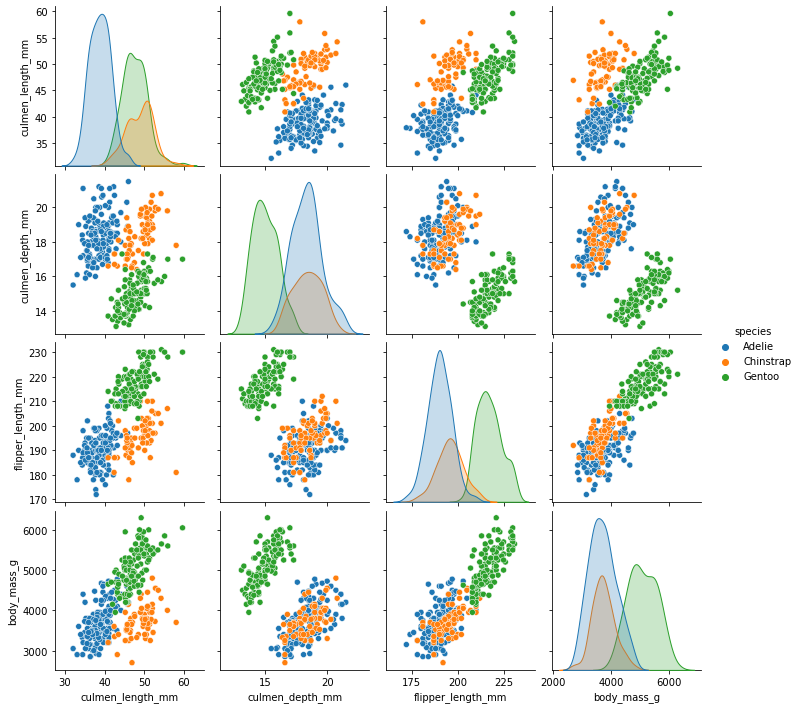

In [10]:
#The sns.pairplot() automatically gives us lots of the scatter plots. 
sns.pairplot(penguins, hue='species', height=2.5);

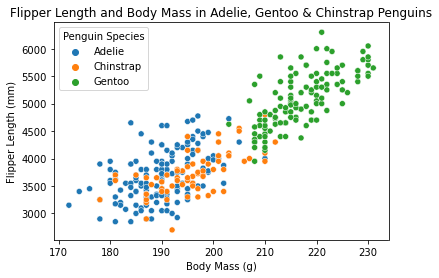

In [14]:
#Next we'll make a single scatter plot focused on the flipper and body mass specifically
sns.scatterplot(data=penguins, x='flipper_length_mm',y='body_mass_g', hue='species');
plt.title('Flipper Length and Body Mass in Adelie, Gentoo & Chinstrap Penguins');
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
plt.legend(title='Penguin Species')

## Interpretation
While there are some differences across the species within each of the species (e.g. Gentoo have shorter culmens) heaver pengiuns have bigger body parts in general.  Flipper length is very strongly correlated with body mass across all species. 

## Other ways

below are a few other ways you can make them 

Text(0.5, 0, 'Body Mass (g)')

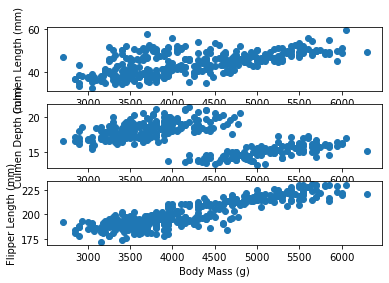

In [37]:
#Here we just call plt.scatter a few times to create our figures

plt.subplot(3,1,1)
plt.scatter(penguins['body_mass_g'],penguins['culmen_length_mm'])
plt.ylabel('Culmen Length (mm)')

plt.subplot(3,1,2)
plt.scatter(penguins['body_mass_g'],penguins['culmen_depth_mm'])
plt.ylabel('Culmen Depth (mm)')

plt.subplot(3,1,3)
plt.scatter(penguins['body_mass_g'],penguins['flipper_length_mm'])
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Body Mass (g)')


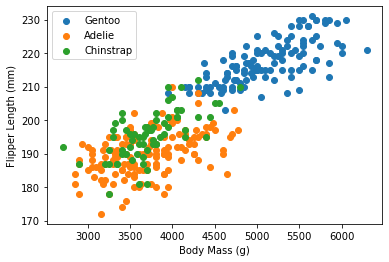

In [38]:

#One way to make a multiple color plot is to call scatter multiple times
#Since we have separated the data into separate dataframes for each species we can
#use that here.
plt.scatter(gentoo['body_mass_g'],gentoo['flipper_length_mm'])
plt.scatter(adelie['body_mass_g'],adelie['flipper_length_mm'])
plt.scatter(chinstrap['body_mass_g'],chinstrap['flipper_length_mm'])

plt.ylabel('Flipper Length (mm)')
plt.xlabel('Body Mass (g)')
plt.legend(['Gentoo','Adelie','Chinstrap'])

In [39]:

#Another way to make the plot is to use the PANDAS plotting function.   This needs a first step to instruct PANDAS
# If you want to label colors you
#


#When we read in the penguins dataset it treated species as a bunch of individiual names
#really its a categorical variable.   
#Note the output at the bottom of this cell:
# Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']
# That says this series is a categorical variable with 3 levels for the 3 species. 
penguins['species']= penguins['species'].astype('category')

penguins['species']

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

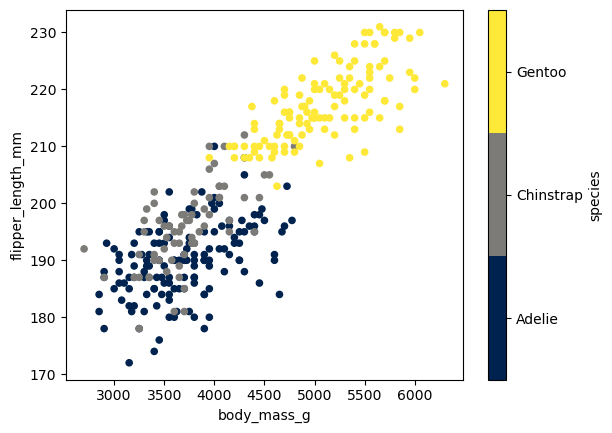

In [40]:
plt.style.use('default')
#With species setup to be  a categorical variable we can use the PANDAS plot.scatter()  to get a colored scatter
#using just a few options.   It uses matplotlib under the hood, but knows about everything
#in the penguins dataframe so it provides a rather nice and simple syntax. 

penguins.plot.scatter(x='body_mass_g',y='flipper_length_mm',c='species',cmap='cividis')

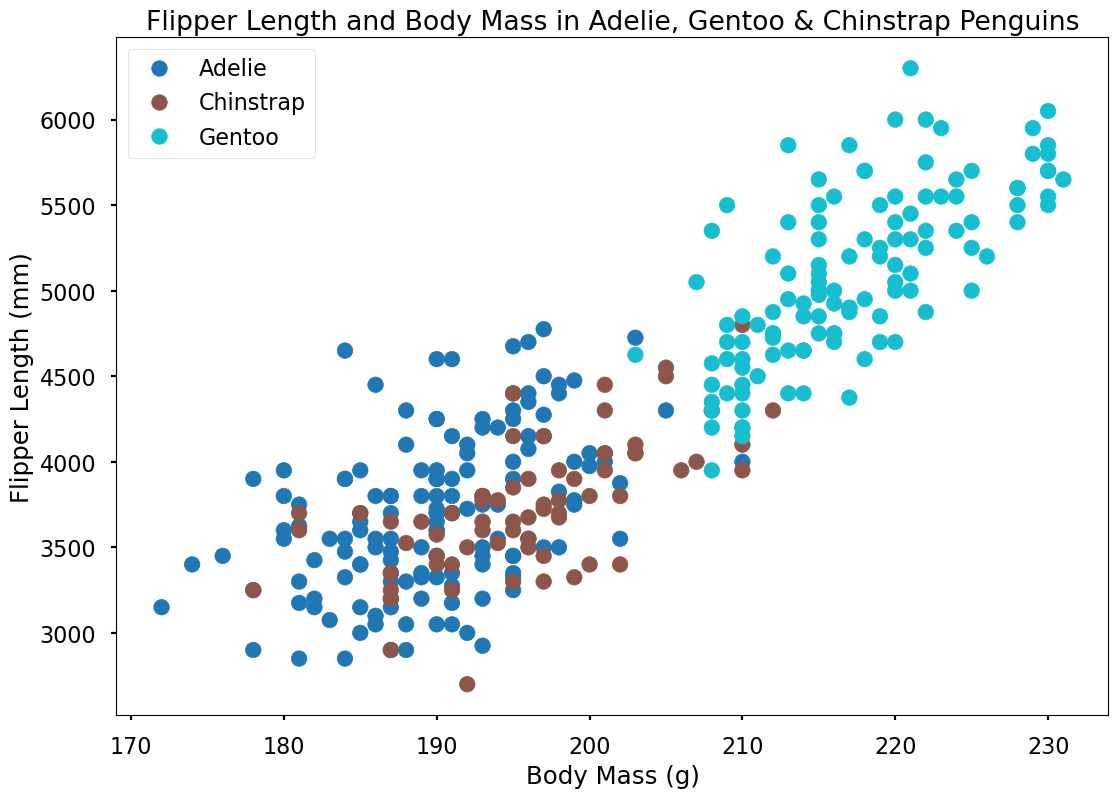

In [41]:
#Here's another way to make the plot using matplotlib directly. 
#Inspired by a question a student asked in teams about making a legend using c= coding. 
#In order to use plt.scatter() c= option the color value must be a number. 
#But our species are names.   In order to get numbers for each species in the dataset we can use
# pd.factorize() to generate numbers for us and pass those into plt.scatter()

plt.style.use('seaborn-poster')
#Take species and generate a numeric code for the species names
speciesCodes,speciesLabels = pd.factorize(penguins['species'])

myScatter = plt.scatter(penguins['flipper_length_mm'],penguins['body_mass_g'],c=speciesCodes,cmap='tab10')
plt.title('Flipper Length and Body Mass in Adelie, Gentoo & Chinstrap Penguins');
plt.xlabel("Body Mass (g)")
plt.ylabel("Flipper Length (mm)")
# plt.legend(['speciesLabels','test','test3'])

#Find the different colors and setup  elements for each of the different colors and return 
#2 variables "handles" connects to the legend, "labels" is what to show.
handles, labels = myScatter.legend_elements(prop='colors')
#Create the actual legend on the plot.
plt.legend(handles, speciesLabels)
